<a href="https://colab.research.google.com/github/lukaszplust/NUMERICAL_METHODS/blob/main/Interpolation_MN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

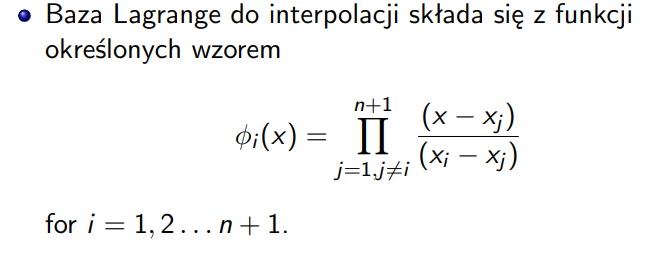

In [9]:
def lagrange_interpolate(point_x,point_y,x):
  value_interpolated = 0
  n = len(point_x)
  for i in range(n):
    fi = 1
    for j in range(n):
      if i != j:
        fi *= (x - point_x[j]) / (point_x[i] - point_x[j]) #tu może jeszcze powinno być 1.0 * przed nawiasem
    value_interpolated += (fi * point_y[i])
  return value_interpolated


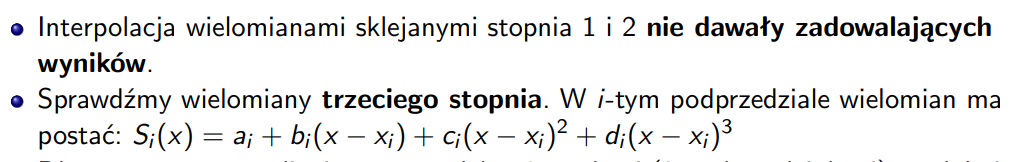

In [4]:
def spline_interpolate(point_x, parameters,x):
      for i in range(len(point_x)-1):
        if point_x[i] <= x <= point_x[i+1]:#czy x znajduje sie pomiedzym i-tym wezłem
          h = x - point_x[i] # odległość między węzłami. Zakładam, że węzły śą równo-odległe
          a,b,c,d = parameters[i]
        
          return a + b* h + c * (h**2) + d * (h**3)#wielomian trzeciego stopnia

      return 0